In [68]:
## Reference: https://medium.com/@nikolasmoya/simple-algorithm-to-remove-moving-objects-from-pictures-cdd3396c68e0

In [33]:
import cv2 as cv
import numpy as np
import glob
import pylab as plt

In [6]:
def median_stack_filter (imgs): 
    """Apply median stack filter to list of images

    Args:
        imgs: image list
        
    Returns: the update image
    """    
    rows = read_images[0][:,:,0].shape[0]
    cols = read_images[0][:,:,0].shape[1]
    updated_img = np.zeros_like(read_images[0])
    channel = 3

    for i in range(rows):
        for j in range(cols):
            for c in range(channel):
                value = np.zeros(len(read_images))  
                for k in range(len(read_images)):
                    value[k] = read_images[k][i, j, c]
                updated_img[i, j, c] = np.median(value)
    
    return updated_img

In [35]:
def plot_updated(sample_size, first_img, updated_img):
       
    fig, ax = plt.subplots(1,2) 
    ax[0].imshow(first_img)
    ax[1].imshow(updated_img)
    ax[0].title.set_text('1st Image in the Sample')   
    ax[1].title.set_text('MSF with '+str(sample_size)+' samples')  


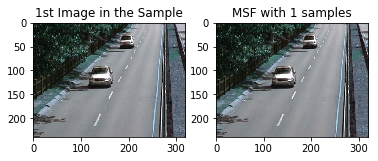

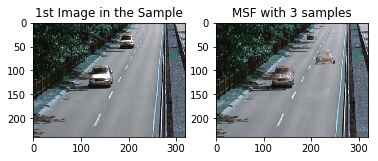

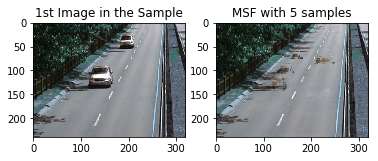

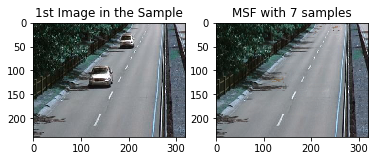

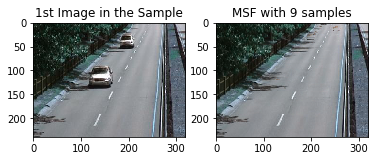

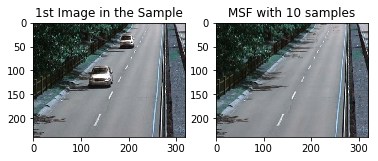

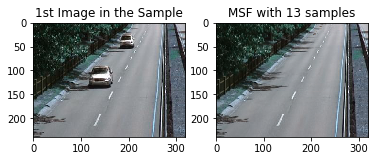

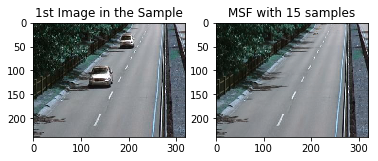

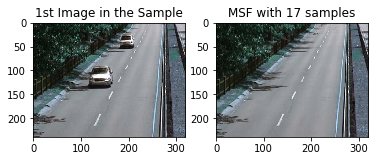

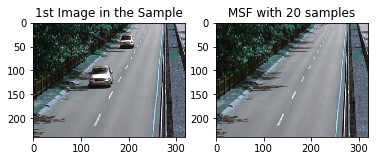

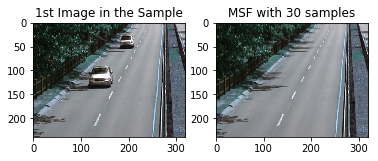

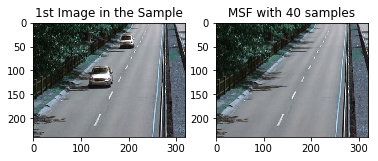

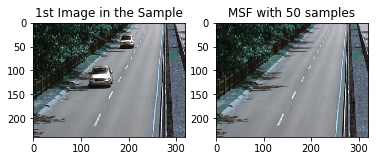

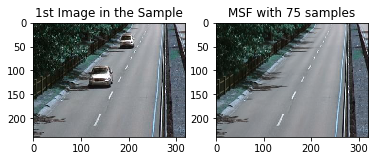

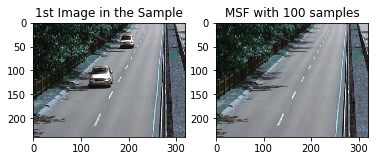

In [38]:
path = 'C:\\Users\\Desktop\\highway\\input\\'
files = glob.glob(path+'/*.jpg')
sample_size_list = np.array([1, 3, 5, 7, 9, 10, 13, 15, 17, 20, 30, 40, 50, 75, 100])

imagenames_list = []
for f in files:
    imagenames_list.append(f)
    
for s in sample_size_list:
    np.random.seed(229)
    small_sample = np.random.randint(len(imagenames_list), size=s)
    read_images=[]
    for idx in small_sample:
        read_images.append(cv.imread(imagenames_list[idx], 1))
    updated_image = median_stack_filter(read_images)
    plot_updated(s, read_images[0], updated_image)
    